# Calculating regression model of my Dataset

## Quadratic

The polynomial equation is: Y = 0.633273130623746*X^2 + -0.7346411071722132*X + -0.63769916794408


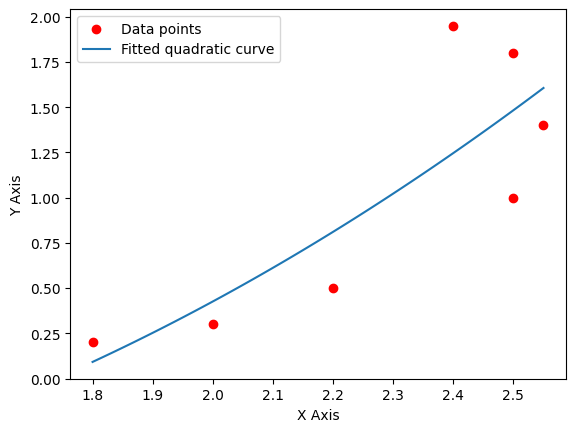

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Data points
X = np.array([1.8, 2, 2.2, 2.5, 2.55, 2.5, 2.4])
Y = np.array([0.19994548, 0.3, 0.5, 1, 1.4, 1.8, 1.95])

# Fit polynomial of degree 2 (quadratic)
coefficients = np.polyfit(X, Y, 2)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print(f"The polynomial equation is: Y = {coefficients[0]}*X^2 + {coefficients[1]}*X + {coefficients[2]}")

# Plot the data points and the fitted curve
plt.scatter(X, Y, color='red', label='Data points')
X_vals = np.linspace(min(X), max(X), 100)
Y_vals = polynomial(X_vals)
plt.plot(X_vals, Y_vals, label='Fitted quadratic curve')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()


## logarithmic

The logarithmic model is: Y = -2.5749 + 4.4061 * ln(X)


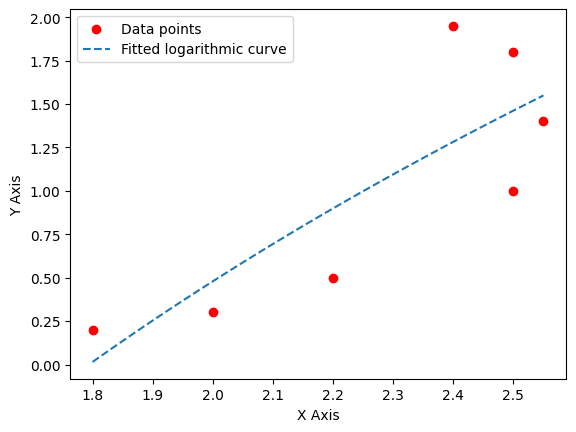

In [3]:
from scipy.optimize import curve_fit

# Logarithmic model: Y = A + B * ln(X)
def logarithmic_model(x, A, B):
    return A + B * np.log(x)

# Fit the logarithmic model to the data
params_log, covariance_log = curve_fit(logarithmic_model, X, Y, p0=[1, 1])

# Get the fitted parameters
A_log, B_log = params_log
print(f"The logarithmic model is: Y = {A_log:.4f} + {B_log:.4f} * ln(X)")

# Plot the data points and the fitted logarithmic curve
plt.scatter(X, Y, color='red', label='Data points')
Y_vals_log = logarithmic_model(X_vals, A_log, B_log)
plt.plot(X_vals, Y_vals_log, label='Fitted logarithmic curve', linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()


## Exponenttial

The exponential model is: Y = 0.0047 * exp(2.2950 * X)


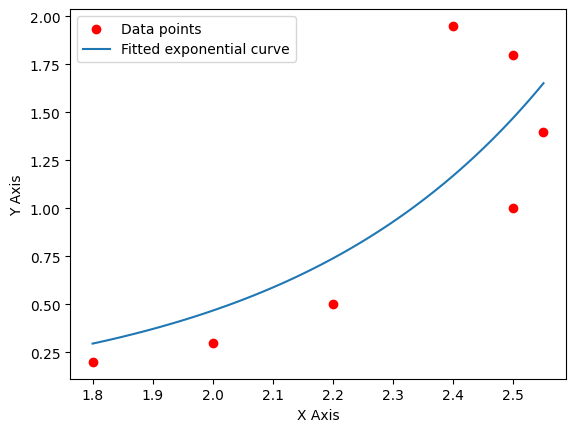

In [4]:
# Given data
X = np.array([1.8, 2, 2.2, 2.5, 2.55, 2.5, 2.4])
Y = np.array([0.19994548, 0.3, 0.5, 1, 1.4, 1.8, 1.95])

# Exponential model: Y = A * exp(B * X)
def exponential_model(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential model to the data
params, covariance = curve_fit(exponential_model, X, Y, p0=[1, 0.5])

# Get the fitted parameters
A, B = params
print(f"The exponential model is: Y = {A:.4f} * exp({B:.4f} * X)")

# Plot the data points and the fitted curve
plt.scatter(X, Y, color='red', label='Data points')
X_vals = np.linspace(min(X), max(X), 100)
Y_vals = exponential_model(X_vals, A, B)
plt.plot(X_vals, Y_vals, label='Fitted exponential curve')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

## Power Law

The power law model is: Y = 0.0115 * exp(5.2959 * X)


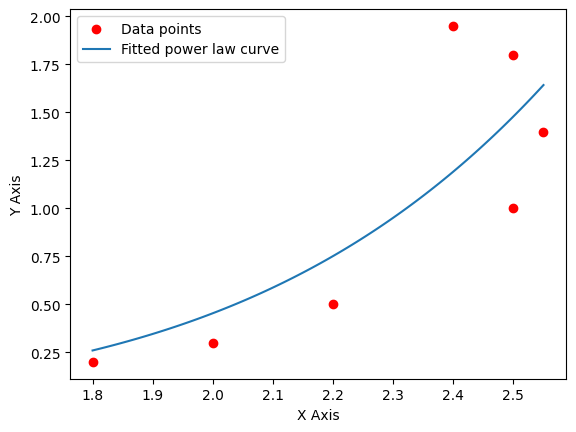

In [5]:
# Given data
X = np.array([1.8, 2, 2.2, 2.5, 2.55, 2.5, 2.4])
Y = np.array([0.19994548, 0.3, 0.5, 1, 1.4, 1.8, 1.95])

# Power law model: Y = A * X^B
def power_law_model(x, A, B):
    return A * x**B

# Fit the exponential model to the data
params, covariance = curve_fit(power_law_model, X, Y, p0=[1, 0.5])

# Get the fitted parameters
A, B = params
print(f"The power law model is: Y = {A:.4f} * exp({B:.4f} * X)")

# Plot the data points and the fitted curve
plt.scatter(X, Y, color='red', label='Data points')
X_vals = np.linspace(min(X), max(X), 100)
Y_vals = power_law_model(X_vals, A, B)
plt.plot(X_vals, Y_vals, label='Fitted power law curve')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

## Best model finder

Best model: Polynomial
Best parameters: [ 0.63327275 -0.73463943 -0.63770099]
R-squared: 0.6767


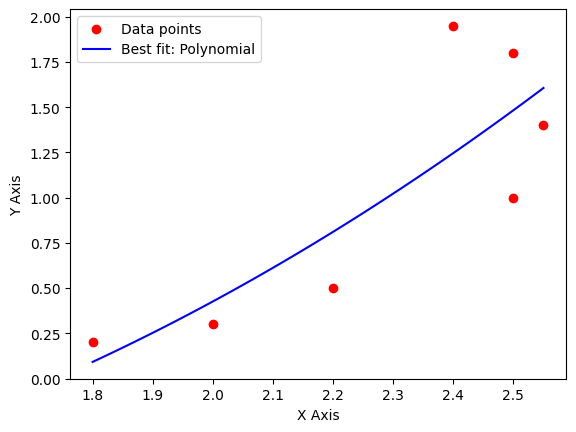

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
X = np.array([1.8, 2, 2.2, 2.5, 2.55, 2.5, 2.4])
Y = np.array([0.19994548, 0.3, 0.5, 1, 1.4, 1.8, 1.95])

# Define a few possible models to try for fitting

# Polynomial model (degree 2)
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

# Exponential model: Y = A * exp(B * X)
def exponential_model(x, A, B):
    return A * np.exp(B * x)

# Logarithmic model: Y = A + B * ln(X)
def logarithmic_model(x, A, B):
    return A + B * np.log(x)

# Power law model: Y = A * X^B
def power_law_model(x, A, B):
    return A * x**B

# List of models to test
models = {
    'Polynomial': polynomial_model,
    'Exponential': exponential_model,
    'Logarithmic': logarithmic_model,
    'Power Law': power_law_model
}

# Initialize variables to store best model and its parameters
best_model = None
best_params = None
best_model_name = ""
best_r_squared = -np.inf

# Try each model and fit the data
for model_name, model_func in models.items():
    # Fit model to data
    try:
        params, covariance = curve_fit(model_func, X, Y, p0=[1, 1, 1] if model_name == 'Polynomial' else [1, 1])
        # Predicted Y values
        Y_pred = model_func(X, *params)
        
        # Calculate R-squared
        residuals = Y - Y_pred
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((Y - np.mean(Y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Track the best model
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_model_name = model_name
            best_model = model_func
            best_params = params

    except Exception as e:
        print(f"Error fitting model {model_name}: {e}")

# Output the best model and parameters
print(f"Best model: {best_model_name}")
print(f"Best parameters: {best_params}")
print(f"R-squared: {best_r_squared:.4f}")

# Plot the data and the best-fit curve
plt.scatter(X, Y, color='red', label='Data points')
X_vals = np.linspace(min(X), max(X), 100)
Y_vals_best = best_model(X_vals, *best_params)
plt.plot(X_vals, Y_vals_best, label=f"Best fit: {best_model_name}", color='blue')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()


## Model generator

Model Coefficients: [2.44230769]
Model Intercept: -4.604807692307693
Mean Squared Error: 0.08368056931165915
R^2 Score: -32.435759434030025


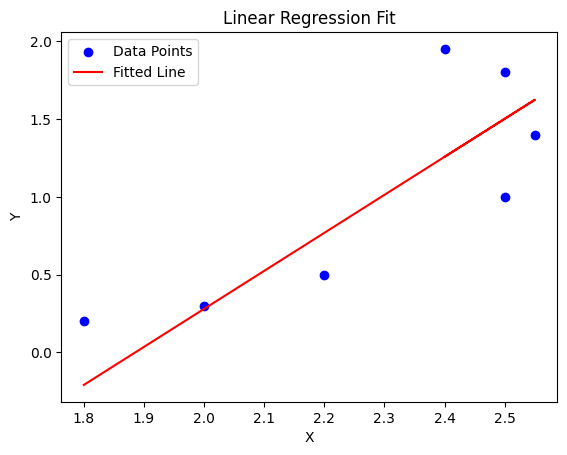

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def define_regression_model(x_points, y_points):
    """
    Define a linear regression model given two arrays of points (x_points, y_points).
    
    Args:
        x_points (array-like): Array of x values (independent variable).
        y_points (array-like): Array of y values (dependent variable).
        
    Returns:
        model (LinearRegression): Trained regression model.
        y_pred (array): Predicted y values from the regression model.
    """
    # Convert points into numpy arrays for easier manipulation
    x_points = np.array(x_points).reshape(-1, 1)  # Reshape x for scikit-learn
    y_points = np.array(y_points)
    
    # Split the data into training and testing sets (80-20 split)
    x_train, x_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)
    
    # Plot the results
    plt.scatter(x_points, y_points, color='blue', label='Data Points')
    plt.plot(x_points, model.predict(x_points), color='red', label='Fitted Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()

    return model, y_pred


# Example of how to use the function
if __name__ == "__main__":
    # Example data: (replace with your own arrays)
    x_points = np.array([1.8, 2, 2.2, 2.5, 2.55, 2.5, 2.4])
    y_points = np.array([0.19994548, 0.3, 0.5, 1, 1.4, 1.8, 1.95])
    
    # Call the function to define the model
    model, y_pred = define_regression_model(x_points, y_points)
